# DS_Taxi_strategy

## Тема:
«Формирование стратегии крупного агрегатора такси (поиск инсайтов, проверка гипотезы, составление рекомендаций стейкхолдерам, построение предиктивной модели)».

## Цель задания:
- Собрать все полученные на курсе знания воедино.
- Закрепить умение исследовать данные, проверять гипотезу, делать выводы и презентовать результаты.
- Закрепить умение исследовать внешние факторы, строить модель, получать прогноз и делать выводы.


## Задание:
### Введение:
Поздравляем! Вы попали на стажировку в одно из подразделений группы компаний, Вы — аналитик крупного агрегатора такси. Теперь перед вами стоит важная задача: самостоятельно провести исследование данных, проверить гипотезу о поведенческом предпочтении пользователей к определённому классу такси и сделать выводы, чтобы помочь компании стать лучшей на рынке. Успехов!



In [1]:
import numpy as np # Numerical Python
import pandas as pd # работа с данными
import matplotlib.pyplot as plt # визуализация
import seaborn as sns
from scipy import stats # статистика

### 1	Загрузите файл dip_hw_x_taxi.csv в pandas dataframe

In [2]:
my_path = r'data/dip_hw_x_taxi.csv'
data = pd.read_csv(my_path)
data.head()

,order_gk,weekday_key,hour_key,distance_km,offer_class_group,driver_response
0,412,7,23,53.114,Premium,1
1,436,3,10,5.781,Delivery,1
2,1327,6,19,16.200,Delivery,0
3,2013,2,2,13.732,Delivery,0
4,2241,6,3,20.436,Premium,1


In [50]:
data.columns

Index(['order_gk', 'weekday_key', 'hour_key', 'distance_km',
       'offer_class_group', 'driver_response', 'workday'],
      dtype='object')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   order_gk           2000 non-null   int64  
 1   weekday_key        2000 non-null   int64  
 2   hour_key           2000 non-null   int64  
 3   distance_km        2000 non-null   float64
 4   offer_class_group  2000 non-null   object 
 5   driver_response    2000 non-null   int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 93.9+ KB


Значение столбцов: 

- order_gk — идентификатор поездки;
- weekday_key — день недели совершения поездки;
- hour_key — час совершения поездки;
- distance_km — дистанция поездки;
- offer_class_group — класс поездки (Economy, Comfort, Premium, Delivery);
- driver_response — статус поездки (1 — поездка совершена; 0 — отмена).

### 2	Рассчитайте основные описательные статистики (среднее, минимум, 25-50-75-персентили, максимум)

In [4]:
data.describe()

,order_gk,weekday_key,hour_key,distance_km,driver_response
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,462807.384000,4.044000,11.608500,26.275848,0.587000
std,270556.211847,2.007256,6.918465,18.876336,0.492496
min,412.000000,1.000000,0.000000,0.024000,0.000000
25%,227126.500000,2.000000,6.000000,12.177000,0.000000
50%,458637.000000,4.000000,12.000000,22.828500,1.000000
75%,709420.250000,6.000000,18.000000,36.434250,1.000000
max,919196.000000,7.000000,23.000000,138.950000,1.000000


In [67]:
data[data['distance_km']==0.024000]

,order_gk,weekday_key,hour_key,distance_km,offer_class_group,driver_response,workday
634,289990,5,0,0.024,Comfort,0,True


In [46]:
data[data['distance_km']==138.950000]

,order_gk,weekday_key,hour_key,distance_km,offer_class_group,driver_response,workday
1438,679357,1,3,138.95,Premium,0,True


### Вопросы:
1. Как распределяется количество поездок по дням недели? По часам? По часам в будни и в выходные? 

*Найти в какой день недели больше/меньше всего поездок? В какие часы?*

2. Как распределяются поездки по классам? 

*Определить количество поезок каждого из них.
Какие классы поездок (Economy, Comfort, Premium, Delivery) наиболее популярны?*

3. В какой день / час больше или меньше всмего поездок для каждого класса?

*Выявить закономерности по периодам времени поездок по каждому классу сервиса.*

4. Какое среднее расстояние поездки для каждого класса?

   *Выявить закономерности в длине поездок по каждому классу сервиса.*

5. Каково отношение количества отмененных поездок ко всем поездкам? 


6. Поездки какого класса чаще всего отменяют? А в процентном соотношении по классам? 
*Есть ли зависимости между классом поездки и вероятностью ее отмены?*

7. Какие изменения в спросе и отменах поездок в разные дни недели и часы?

8. Как меняется количество отмен относительно длины поездки? А для каждого класса? 

9. Какие закономерность между отменами поездок и дистанцией?

1. Как распределяется количество поездок по дням недели? По часам? По часам в будни и в выходные? 

*Найти в какой день недели больше/меньше всего поездок? В какие часы?
В какие дни и часы наблюдается пик спроса на такси?*

Ответ: 

Больше всего поездок в воскресенье, меньше всего в среду и в пятницу, а также в понедельник очень мало заказов.

В будни пик спроса на такси наблюдается в 13, 1, 16, 8 и 7 часов. 
В выходные дни самый высокий спрос в 20 и 00, также высокий спрос в 5 и 15 часов. 

Минимальное количество заказов по будням в 15 часов.
А по выходным - в 1 (час).

In [5]:
data['workday'] = data['weekday_key'] <= 5

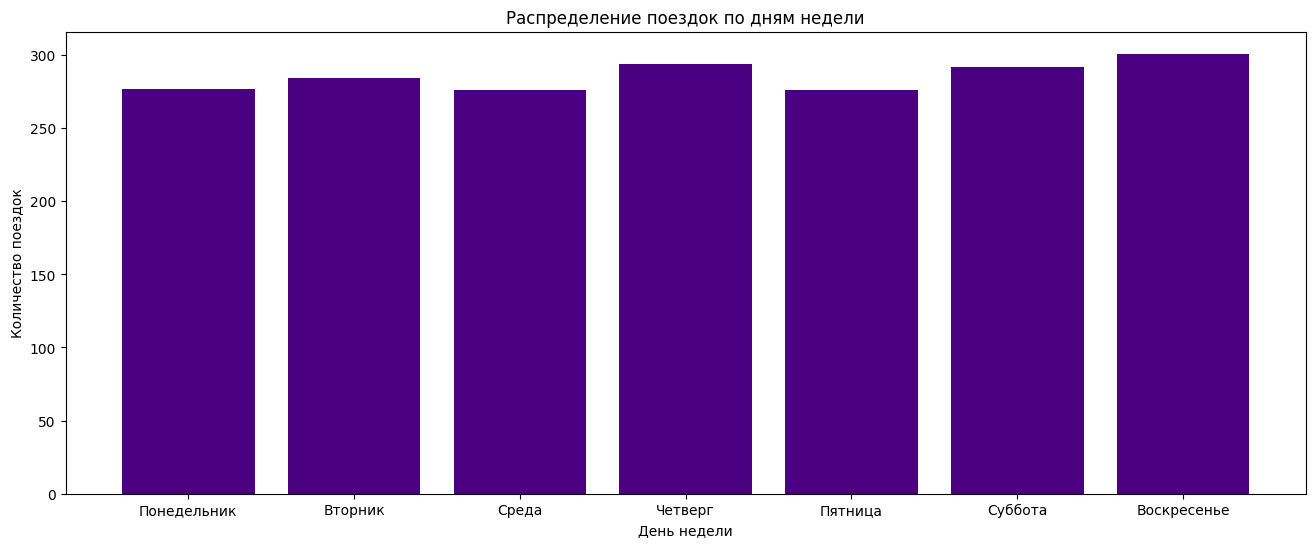

weekday_key
1    277
2    284
3    276
4    294
5    276
6    292
7    301
Name: count, dtype: int64
Больше всего поездок в: Воскресенье
Меньше всего поездок в: Среда



In [43]:
weekday_dict = {1: 'Понедельник', 2: 'Вторник', 3: 'Среда', 4: 'Четверг',
                5: 'Пятница', 6: 'Суббота', 7: 'Воскресенье'}

# Количество поездок по дням недели
trips_by_weekday = data['weekday_key'].value_counts().sort_index()

plt.figure(figsize=(16, 6))
bar_labels = [weekday_dict[day] for day in trips_by_weekday.index]

plt.bar(trips_by_weekday.index, trips_by_weekday.values, color='indigo')
plt.xticks(ticks=trips_by_weekday.index, labels=bar_labels)
plt.title('Распределение поездок по дням недели')
plt.xlabel('День недели')
plt.ylabel('Количество поездок')
plt.show()

print(trips_by_weekday)
print(f'Больше всего поездок в: {weekday_dict[trips_by_weekday.idxmax()]}')
print(f'Меньше всего поездок в: {weekday_dict[trips_by_weekday.idxmin()]}\n')


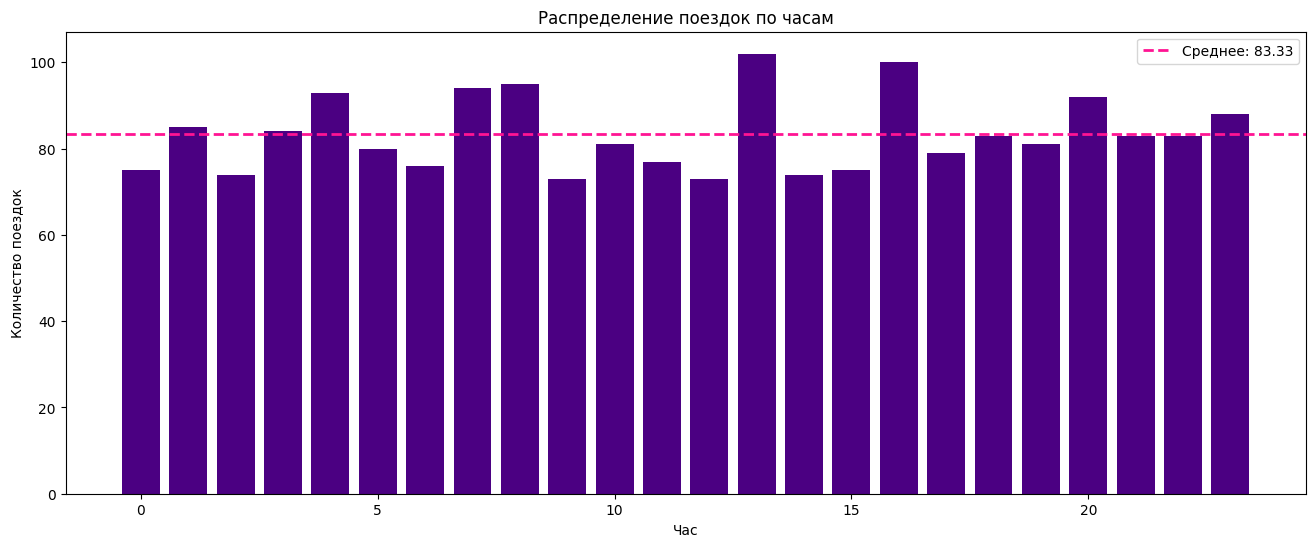

In [52]:
plt.figure(figsize=(16, 6))
trips_by_hour = data['hour_key'].value_counts()
mean_by_hour = trips_by_hour.mean()
plt.bar(trips_by_hour.index, trips_by_hour.values, color='indigo')
plt.axhline(mean_by_hour, color='deeppink', linestyle='--', label=f'Среднее: {mean_by_hour:.2f}', lw=2)
plt.title('Распределение поездок по часам')
plt.xlabel('Час')
plt.ylabel('Количество поездок')
plt.legend()
plt.show()


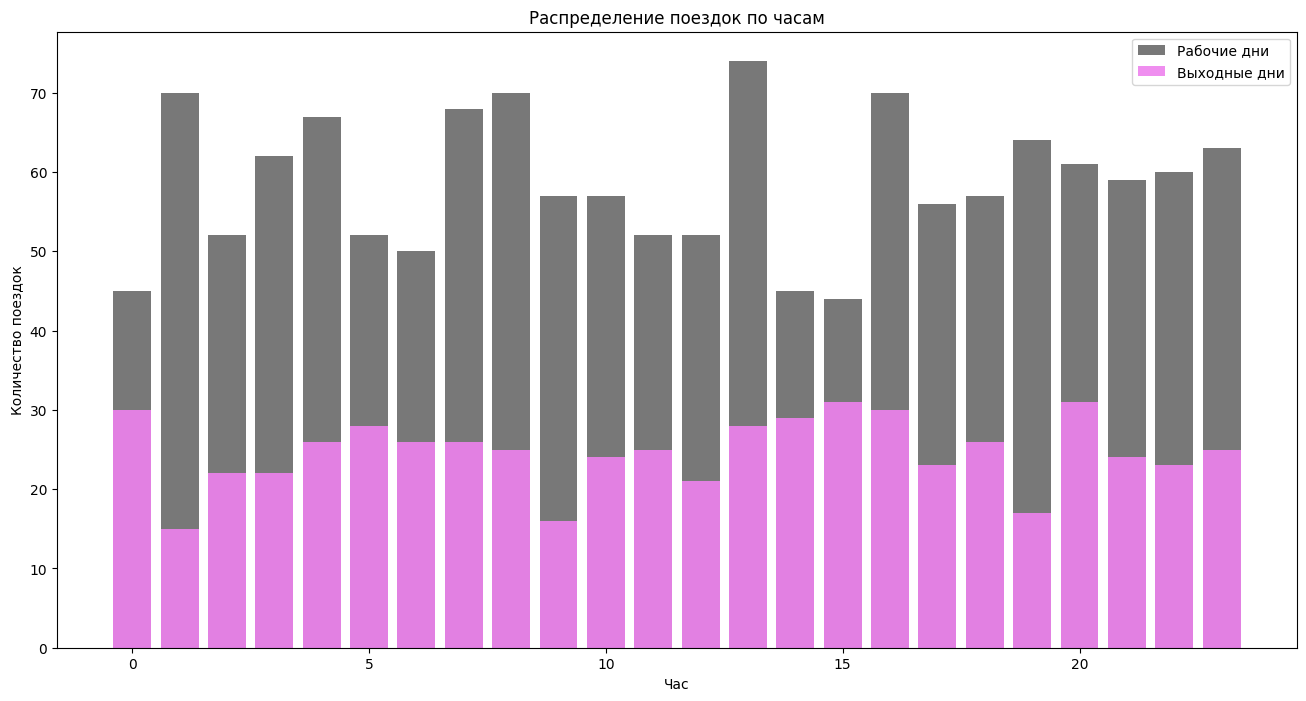

In [66]:
plt.figure(figsize=(16, 8))

# Фильтрация данных по рабочим и выходным дням
trips_by_hour_workday = data[data['workday'] == True]['hour_key'].value_counts()
trips_by_hour_weekend = data[data['workday'] == False]['hour_key'].value_counts()

plt.bar(trips_by_hour_workday.index, trips_by_hour_workday.values, color='dimgray', alpha=0.9, label='Рабочие дни')
plt.bar(trips_by_hour_weekend.index, trips_by_hour_weekend.values, color='violet', alpha=0.9, label='Выходные дни')

plt.title('Распределение поездок по часам')
plt.xlabel('Час')
plt.ylabel('Количество поездок')
plt.legend()
plt.show()


In [8]:
print(f'Пик спроса в  {trips_by_hour_workday.idxmax()}.00 (рабочий день)')
print(f'Минимум поездок в  {trips_by_hour_workday.idxmin()}.00 (рабочий день)\n')
print(f'Пик спроса в {trips_by_hour_weekend.idxmax()}.00 (выходной день)')
print(f'Минимум поездок в {trips_by_hour_weekend.idxmin()}.00 (выходной день)')

Пик спроса в  13.00 (рабочий день)
Минимум поездок в  15.00 (рабочий день)

Пик спроса в 20.00 (выходной день)
Минимум поездок в 1.00 (выходной день)


### 3	Вычислите количество значений по классам такси

2. Как распределяются поездки по классам? 

*Определить количество поезок каждого из них.
Какие классы поездок (Economy, Comfort, Premium, Delivery) наиболее популярны?*

offer_class_group
Premium     500
Delivery    500
Comfort     500
Economy     500
Name: count, dtype: int64


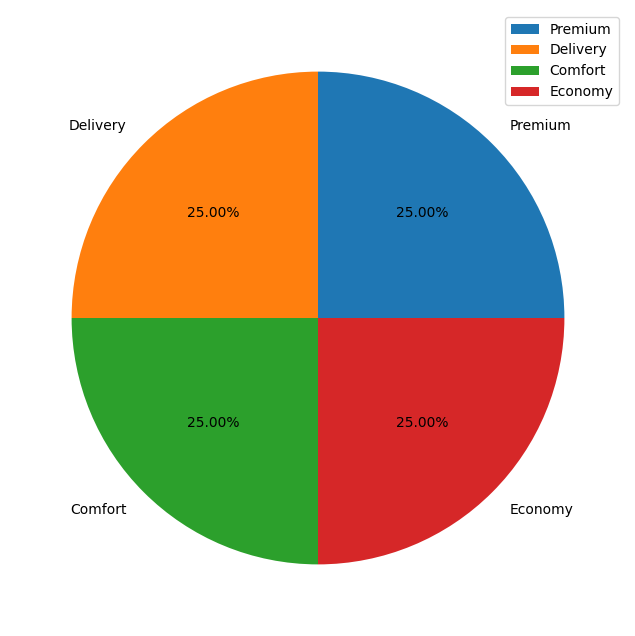

In [9]:
plt.figure(figsize=(16, 8))
trips_by_class = data['offer_class_group'].value_counts()
print(trips_by_class.sort_values())

plt.pie(trips_by_class.values, labels=trips_by_class.index, autopct='%1.2f%%')
plt.legend(loc='upper right')
plt.show()

Классы сбалансированы

3. В какой день / час больше или меньше всмего поездок для каждого класса?

*Выявить закономерности по периодам времени поездок по каждому классу сервиса.*

Text(0, 0.5, 'Количество поездок')

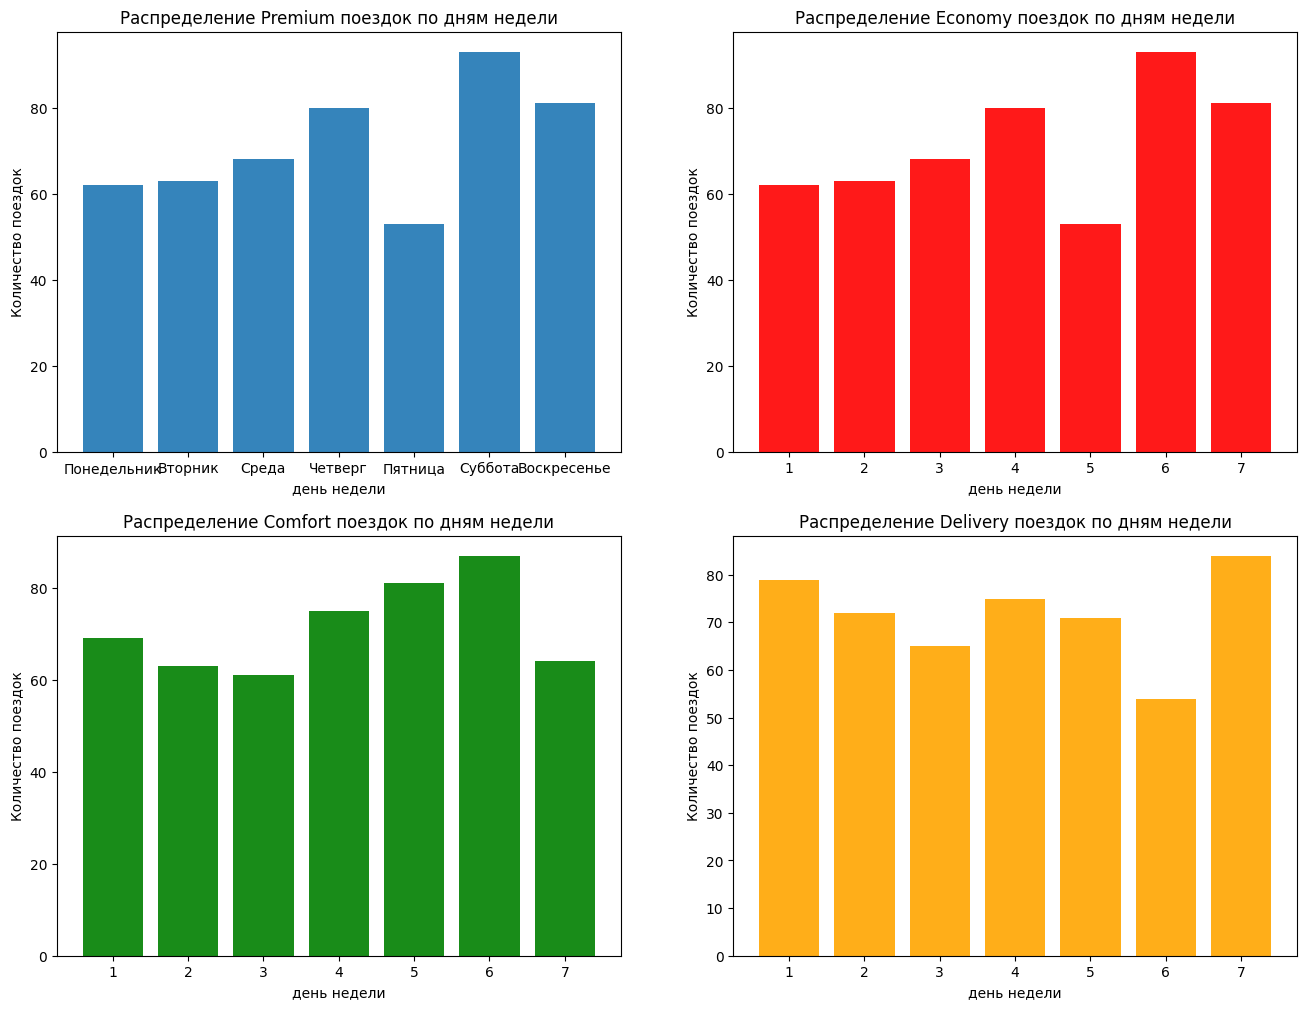

In [44]:
plt.figure(figsize=(16, 12))

# Фильтрация данных по классам на каждый день недели
trips_by_day_premium = data[data['offer_class_group'] == 'Premium']['weekday_key'].value_counts()
trips_by_day_delivery = data[data['offer_class_group'] == 'Delivery']['weekday_key'].value_counts()
trips_by_day_comfort = data[data['offer_class_group'] == 'Comfort']['weekday_key'].value_counts()
trips_by_day_economy = data[data['offer_class_group'] == 'Economy']['weekday_key'].value_counts()


plt.subplot(2, 2, 1)
plt.bar(trips_by_day_premium.index, trips_by_day_premium.values, alpha=0.9, label='Premium')
plt.title('Распределение Premium поездок по дням недели')
plt.xlabel('день недели')
plt.ylabel('Количество поездок')

plt.subplot(2, 2, 2)
plt.bar(trips_by_day_premium.index, trips_by_day_premium.values, alpha=0.9, label='Economy', color='red')
plt.title('Распределение Economy поездок по дням недели')
plt.xlabel('день недели')
plt.ylabel('Количество поездок')

plt.subplot(2, 2, 3)
plt.bar(trips_by_day_comfort.index, trips_by_day_comfort.values, alpha=0.9, label='Comfort', color='green')
plt.title('Распределение Comfort поездок по дням недели')
plt.xlabel('день недели')
plt.ylabel('Количество поездок')

plt.subplot(2, 2, 4)
plt.bar(trips_by_day_delivery.index, trips_by_day_delivery.values, alpha=0.9, label='Delivery', color='orange')
plt.title('Распределение Delivery поездок по дням недели')
plt.xlabel('день недели')
plt.ylabel('Количество поездок')


Поездки Premium и Economy классов распределены по дням недели одинаково: самый высокий спрос в субботу, чуть ниже в четверг и в воскресенье. 

Поездки по тарифу Comfort также имеют высокий уровень спроса в субботу, но в отличие от двух предыдущих классов они пользуются популярностью в пятницу. 


Поездки по тарифу Delivery также имеют самый низкий уровень спроса в субботу, а самый высокий в воскресенье. 

Text(0, 0.5, 'Количество поездок')

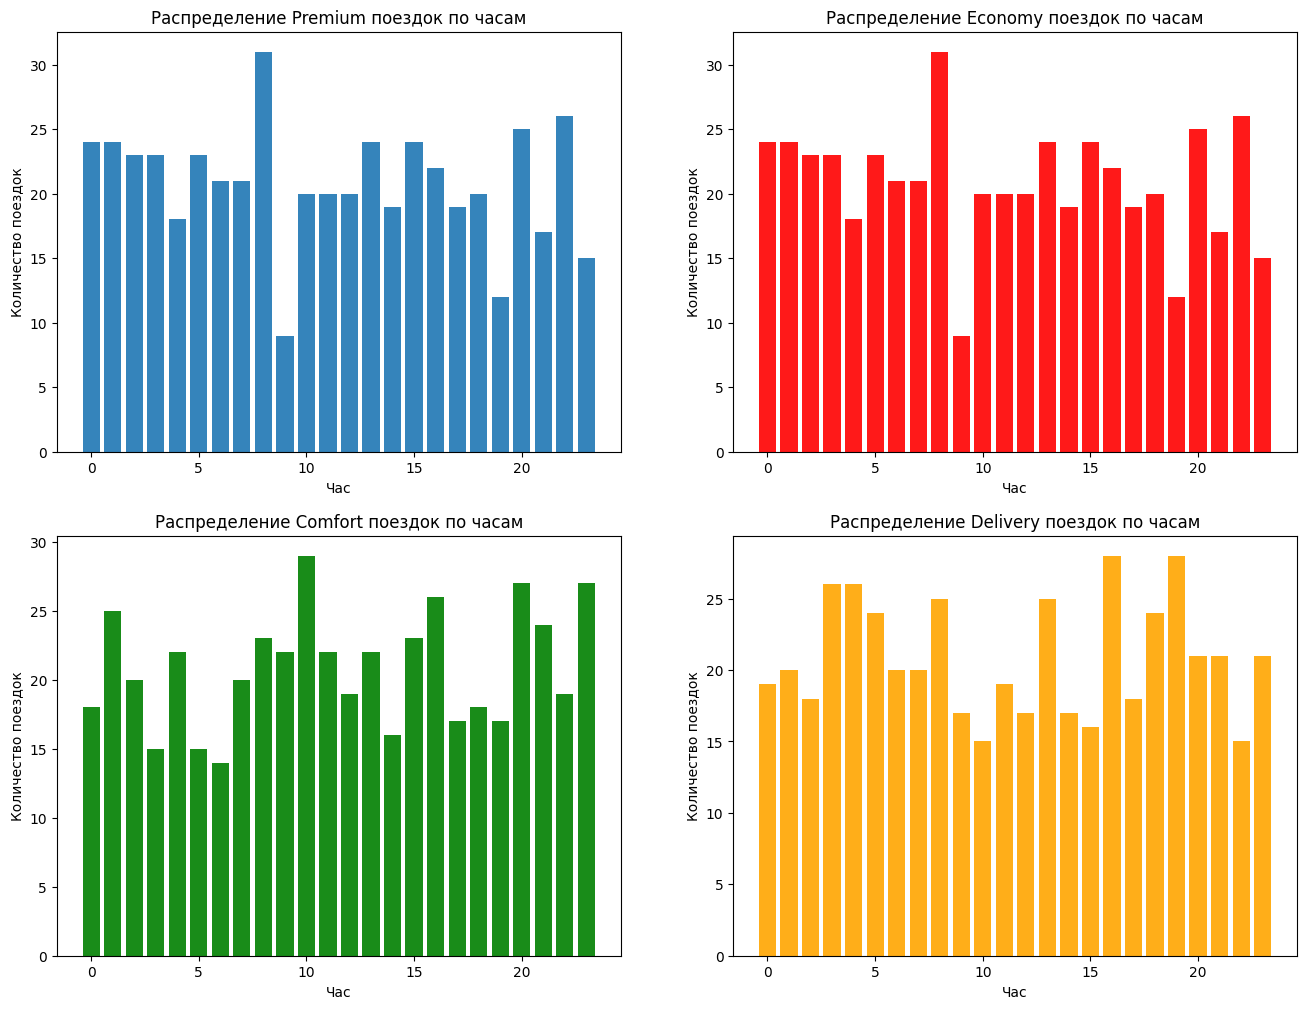

In [11]:
plt.figure(figsize=(16, 12))

# Фильтрация данных по классам на каждый час
trips_by_hour_premium = data[data['offer_class_group'] == 'Premium']['hour_key'].value_counts()
trips_by_hour_delivery = data[data['offer_class_group'] == 'Delivery']['hour_key'].value_counts()
trips_by_hour_comfort = data[data['offer_class_group'] == 'Comfort']['hour_key'].value_counts()
trips_by_hour_economy = data[data['offer_class_group'] == 'Economy']['hour_key'].value_counts()


plt.subplot(2, 2, 1)
plt.bar(trips_by_hour_premium.index, trips_by_hour_premium.values, alpha=0.9, label='Premium')
plt.title('Распределение Premium поездок по часам')
plt.xlabel('Час')
plt.ylabel('Количество поездок')

plt.subplot(2, 2, 2)
plt.bar(trips_by_hour_premium.index, trips_by_hour_premium.values, alpha=0.9, label='Economy', color='red')
plt.title('Распределение Economy поездок по часам')
plt.xlabel('Час')
plt.ylabel('Количество поездок')

plt.subplot(2, 2, 3)
plt.bar(trips_by_hour_comfort.index, trips_by_hour_comfort.values, alpha=0.9, label='Comfort', color='green')
plt.title('Распределение Comfort поездок по часам')
plt.xlabel('Час')
plt.ylabel('Количество поездок')

plt.subplot(2, 2, 4)
plt.bar(trips_by_hour_delivery.index, trips_by_hour_delivery.values, alpha=0.9, label='Delivery', color='orange')
plt.title('Распределение Delivery поездок по часам')
plt.xlabel('Час')
plt.ylabel('Количество поездок')


Поездки Premium и Economy классов распределены по часам примерно одинаково: самый высокий спрос 8 часов, чуть ниже в 20 и 22. Минимальный спрос в 9 и 19 часов. 

Поездки по тарифу Comfort имеют высокий уровень спроса в 10 часов, чуть ниже в 20 и 23 

Поездки по тарифу Delivery сильно отличаются от остальных: минимальный спрос в 10 и 22 часов, пики в 16 и 19, а также в 3 и 4часа. 

### 4	Визуализируйте распределение дистанций поездок

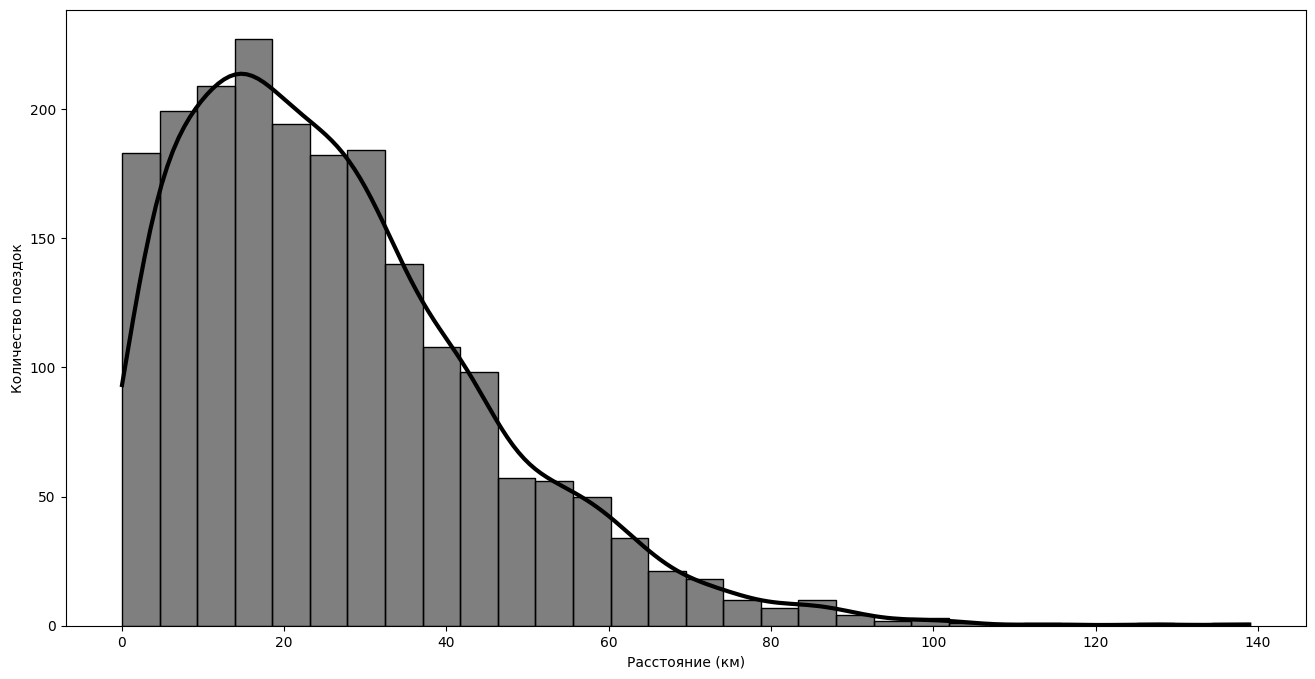

In [47]:
trips_by_distance= data['distance_km']


#  Построение гистограмм по расстоянию для каждого класса
plt.figure(figsize=(16, 8))
sns.histplot(trips_by_distance, kde=True, color='black', bins=30, line_kws = {'lw': 3})
# plt.title('Распределение поездок по расстоянию')
plt.xlabel('Расстояние (км)')
plt.ylabel('Количество поездок')

plt.show()

### 5	Визуализируйте распределения дистанций поездок, по каждому классу такси в отдельности, а также определите типы распределений для эконом-класса и комфорт-класса

In [13]:
class_data = {
    'Premium': data[data['offer_class_group'] == 'Premium']['distance_km'],
    'Economy': data[data['offer_class_group'] == 'Economy']['distance_km'],
    'Comfort': data[data['offer_class_group'] == 'Comfort']['distance_km'],
    'Delivery': data[data['offer_class_group'] == 'Delivery']['distance_km']
}

In [14]:
class_colors = {
    'Premium': sns.color_palette()[0], #'blue',
    'Economy': 'red',
    'Comfort': 'green',
    'Delivery': 'orange'
}

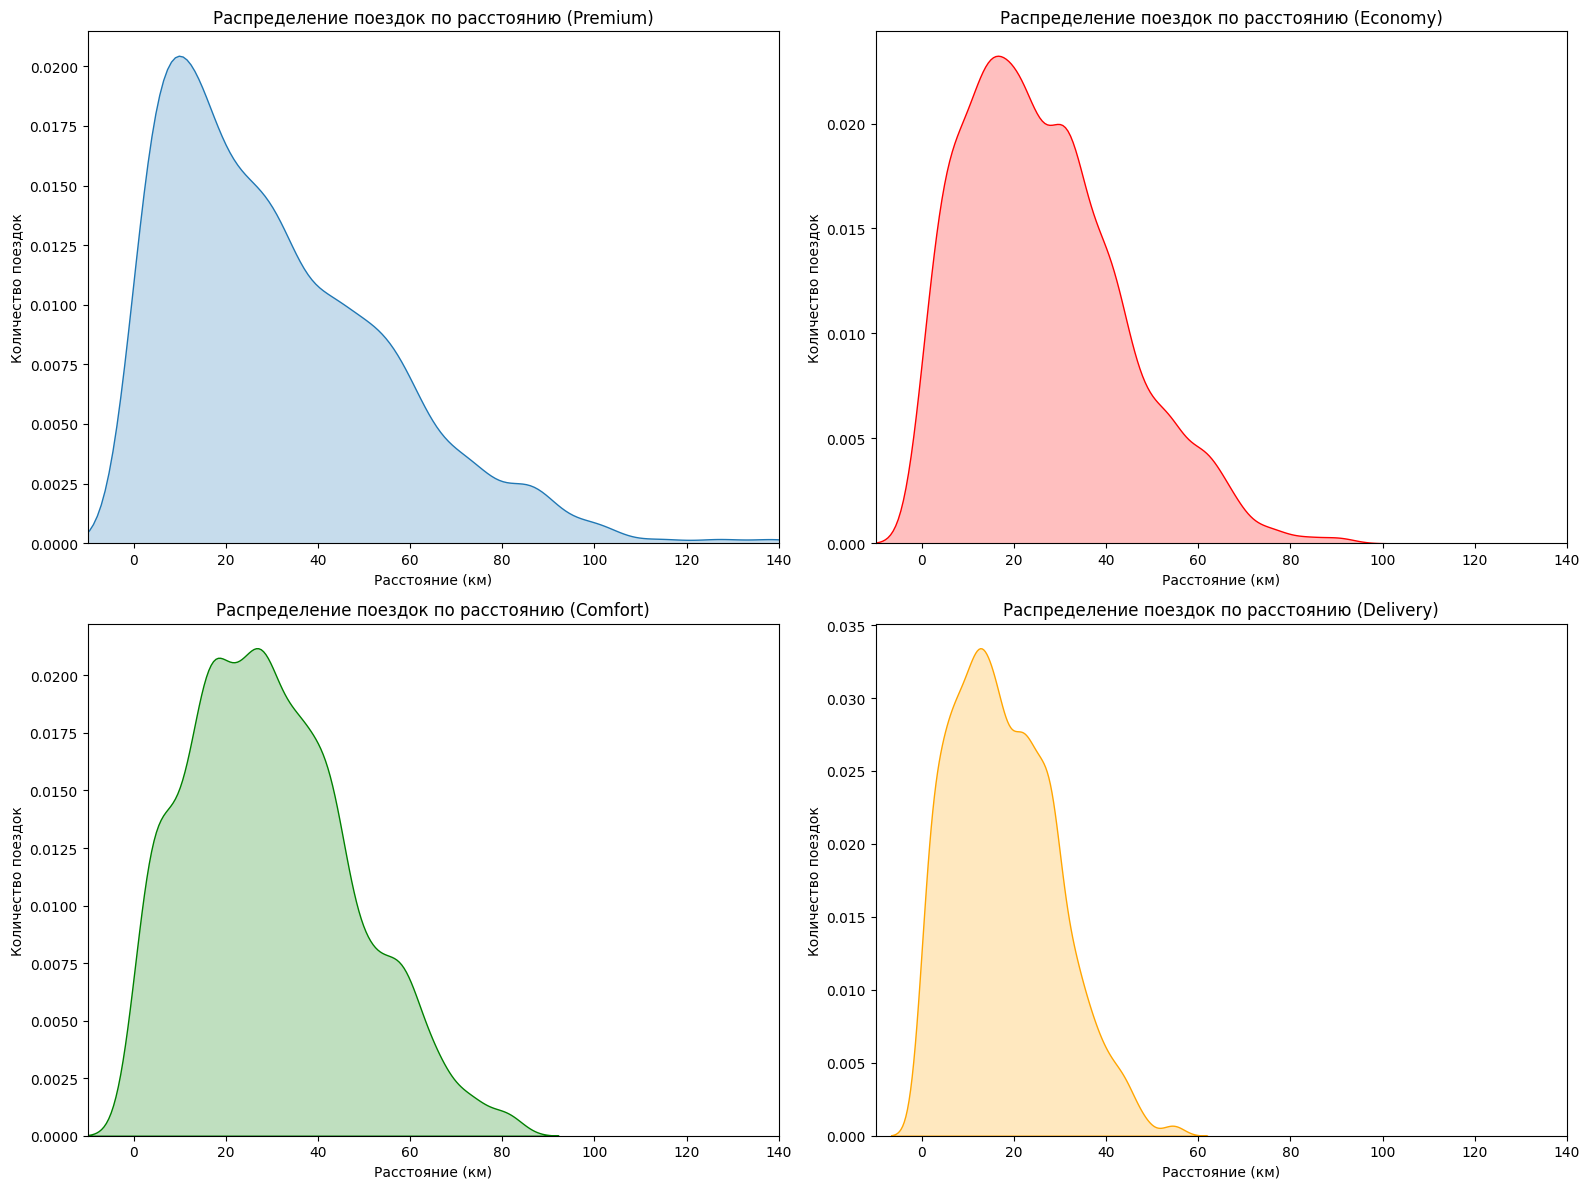

In [59]:
def plot_class_distribution(data_dict, colors):
    plt.figure(figsize=(16, 12))
    
    for idx, (class_name, distances) in enumerate(data_dict.items(), start=1):
        plt.subplot(2, 2, idx)
        sns.kdeplot(distances, fill=True, color=colors[class_name], bw_adjust=0.7)
        plt.title(f'Распределение поездок по расстоянию ({class_name})')
        plt.xlim(-10, 140)
        plt.xlabel('Расстояние (км)')
        plt.ylabel('Количество поездок')
    
    # Упорядочение графиков на странице
    plt.tight_layout()
    plt.show()


plot_class_distribution(class_data, class_colors)

4. Какое среднее расстояние поездки для каждого класса?

   *Выявить закономерности в длине поездок по каждому классу сервиса.*

In [60]:
def add_stats(distances, class_name):
    # Цент распределения
    mean_val = distances.mean()
    median_val = distances.median()
    mode_val = distances.mode()[0]

    # Ширина распределения
    range_val = distances.max() - distances.min()  # Размах
    iqr_val = np.percentile(distances, 75) - np.percentile(distances, 25)  # Межквартильный размах
    variance_val = distances.var()  # Дисперсия
    std_dev_val = distances.std()  # Стандартное отклонение
    coeff_var = (std_dev_val / mean_val) * 100  # Коэффициент вариации

    # Форма распределения
    skewness_val = stats.skew(distances)  # Коэффициент асимметрии
    kurtosis_val = stats.kurtosis(distances)  # Коэффициент эксцесса (острота)

    plt.axvline(mean_val, color='blue', linestyle='--', label=f'Среднее: {mean_val:.2f}')
    plt.axvline(median_val, color='darkcyan', linestyle='--', label=f'Медиана: {median_val:.2f}')
    plt.axvline(mode_val, color='magenta', linestyle='--', label=f'Мода: {mode_val:.2f}')
    plt.legend(loc='upper right')

    # Вывод всех рассчитанных статистик
    print(f"{class_name} класс:")
    print(f"Среднее: {mean_val:.2f}, Медиана: {median_val:.2f}, Мода: {mode_val:.2f}")
    print(f"Размах: {range_val:.2f}, IQR: {iqr_val:.2f}")
    print(f"Дисперсия: {variance_val:.2f}, Стандартное отклонение: {std_dev_val:.2f}, Коэффициент вариации: {coeff_var:.2f}%")
    print(f"Асимметрия: {skewness_val:.2f}, Эксцесс: {kurtosis_val:.2f}\n")


Premium класс:
Среднее: 31.17, Медиана: 26.27, Мода: 2.27
Размах: 138.90, IQR: 34.48
Дисперсия: 596.87, Стандартное отклонение: 24.43, Коэффициент вариации: 78.39%
Асимметрия: 1.02, Эксцесс: 0.91

Economy класс:
Среднее: 26.28, Медиана: 23.80, Мода: 0.09
Размах: 90.43, IQR: 23.47
Дисперсия: 289.55, Стандартное отклонение: 17.02, Коэффициент вариации: 64.74%
Асимметрия: 0.70, Эксцесс: 0.17

Comfort класс:
Среднее: 29.76, Медиана: 28.08, Мода: 25.11
Размах: 81.48, IQR: 24.96
Дисперсия: 311.33, Стандартное отклонение: 17.64, Коэффициент вариации: 59.29%
Асимметрия: 0.48, Эксцесс: -0.29

Delivery класс:
Среднее: 17.89, Медиана: 16.61, Мода: 12.97
Размах: 55.17, IQR: 16.60
Дисперсия: 123.15, Стандартное отклонение: 11.10, Коэффициент вариации: 62.01%
Асимметрия: 0.51, Эксцесс: -0.25



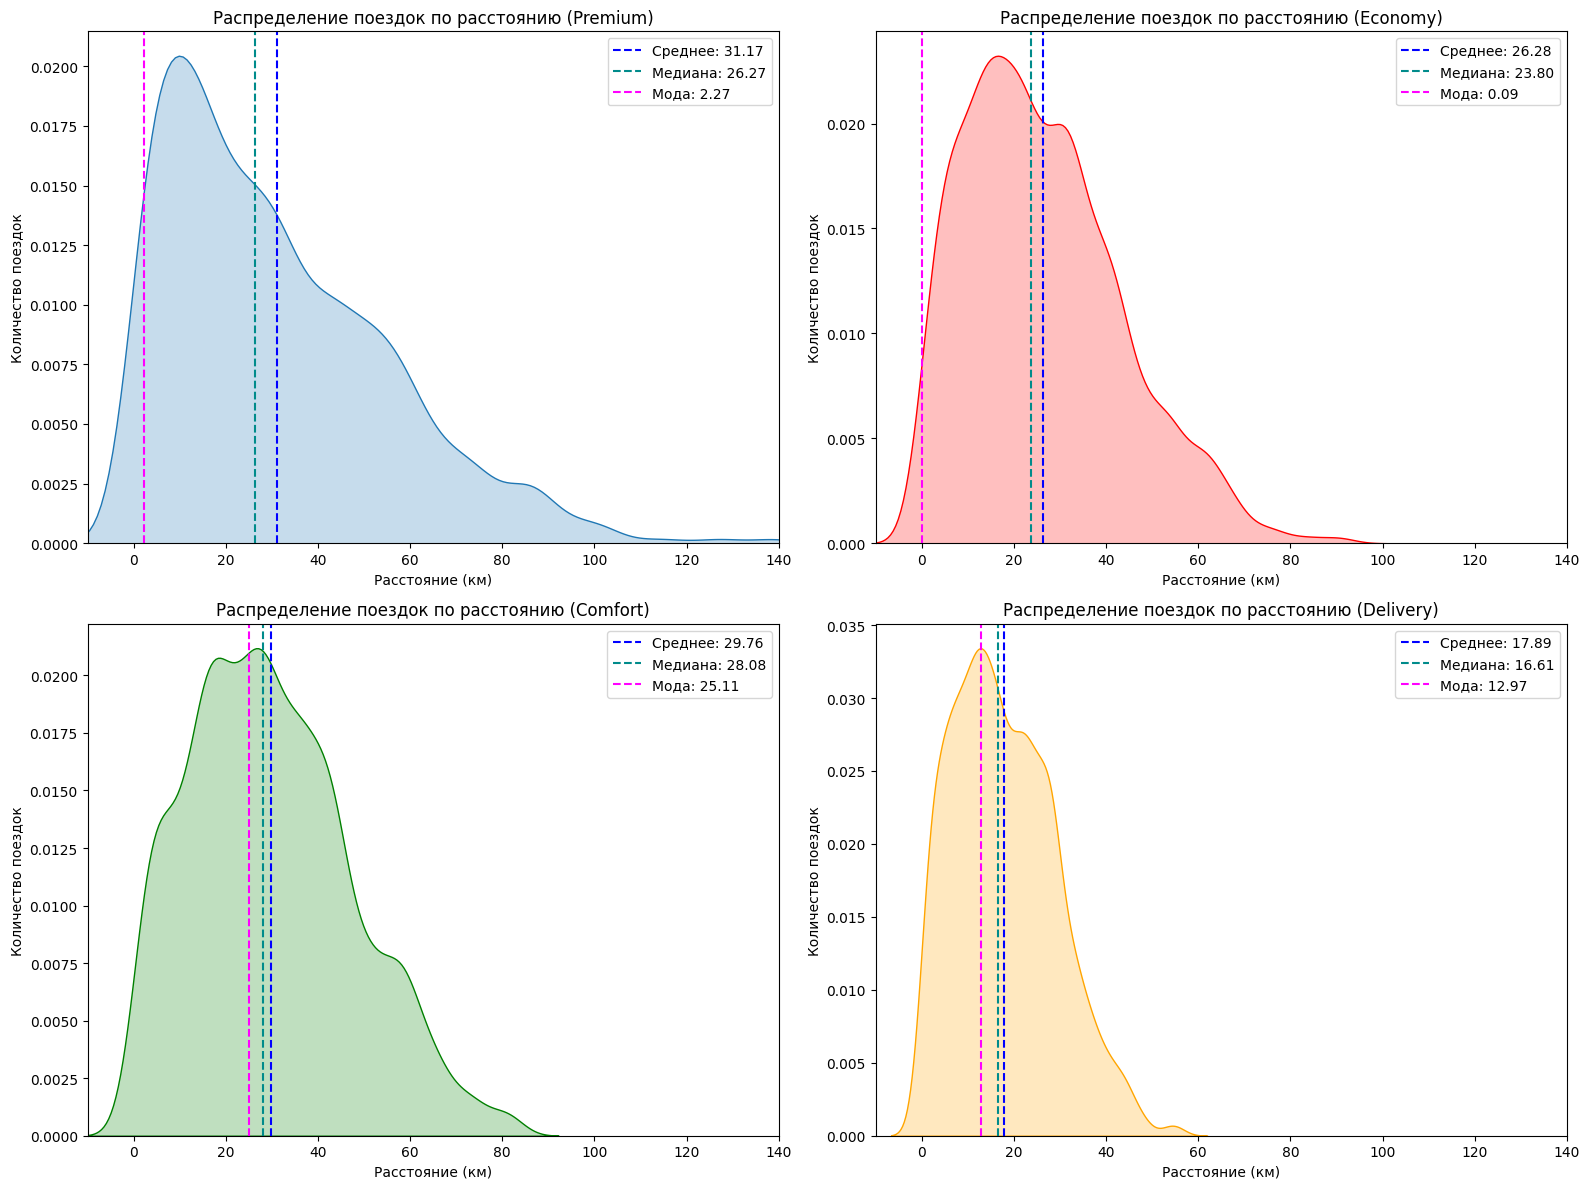

In [61]:
def plot_class_distribution(data_dict, colors):
    plt.figure(figsize=(16, 12))
    
    for idx, (class_name, distances) in enumerate(data_dict.items(), start=1):
        plt.subplot(2, 2, idx)
        sns.kdeplot(distances, fill=True, color=colors[class_name], bw_adjust=0.7)
        plt.title(f'Распределение поездок по расстоянию ({class_name})')
        plt.xlim(-10, 140)
        plt.xlabel('Расстояние (км)')
        plt.ylabel('Количество поездок')
        add_stats(distances, class_name)
    
    # Упорядочение графиков на странице
    plt.tight_layout()
    plt.show()


plot_class_distribution(class_data, class_colors)

Характеристики распределения расстояний поездок для каждого класса: 

- Premium класс - распределение имеет сильное положительное искажение и самый большой размах (138.90), среднее расстояние поездки 31.17 км. Большая часть поездок сконцентрирована в диапазоне 2-26 км. Есть небольшая группа поездок с очень большим километражем, что вызывает правостороннюю асимметрию.
Распределение расстояний показывает высокую изменчивость, что характерно для премиум-сегмента, где могут встречаться как короткие, так и очень длинные поездки.

- Economy класс - распределение также имеет сильное положительное искажение и размах от 0.09 до 90.52 км (90.43), среднее расстояние поездки 26.28 км. Большая часть поездок сконцентрирована в диапазоне 1-24 км. Поездок на длинные дистанции не так много, но они вызывают павостороннюю асимметрию. Дисперсия (289.55) и стандартное отклонение (17.02 км) указывают на высокий разброс значений, но меньше, чем в премиум-классе. Основная масса поездок на короткие дистанции.

- Comfort класс — распределение в этом классе близко к нормальному, но имеет небольшое положительное искажение, размах 81.48 км. Среднее расстояние поездки — 29.76 км, это близко к медианному значению (28.08 км) и значению моды (25.11 км), что указывает на почти симметричное распределение данных. Эксцесс (-0.29) указывает на плоское распределение, то есть оно менее сконцентрировано вокруг среднего значения. А самый низкий по сравнению с другими классами коэффициент вариации говорит о том, что основная масса поездок имеет среднюю длину. 

- Delivery класс — распределение имеет положительное смещение, с наименьшим размахом (55.17 км) по сравнению с другими классами. Среднее расстояние поездки составляет 17.89 км, что близко к медиане (16.61 км) и моде (12.97 км) указывает на то, что чаще всего расстояния доставок в этом классе варьируются в пределах коротких поездок. Эксцесс (-0.25) говорит о слегка плоском распределении. Небольшая дисперсия (123.15) и стандартное отклонение (11.10 км) указывают на более низкую изменчивость по сравнению с другими классами, особенно по сравнению с Premium.



### 6	Сформируйте выборки по эконом и комфорт-классам. Визуализируйте пересечение интервалов дистанций этих классов 
(примечание: поможет функция seaborn.distplot или seaborn.kdeplot)

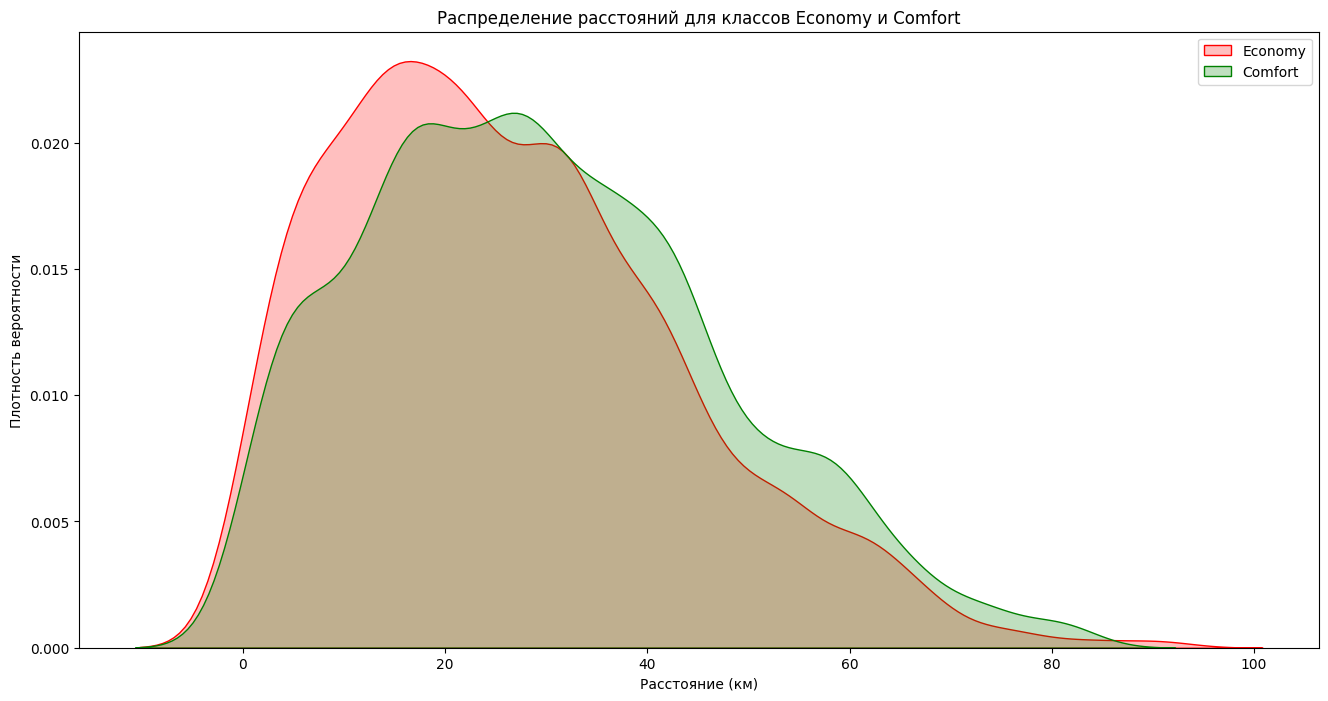

In [62]:
plt.figure(figsize=(16, 8))

sns.kdeplot(class_data['Economy'], fill=True, color='red', bw_adjust=0.7, label='Economy')
sns.kdeplot(class_data['Comfort'], fill=True, color='green', bw_adjust=0.7, label='Comfort')

plt.title('Распределение расстояний для классов Economy и Comfort')
plt.xlabel('Расстояние (км)')
plt.ylabel('Плотность вероятности')
plt.legend()

У классов Economy и Comfort графики схожи основные описательные статистики, но сами распределения отличаются по следующим пунктам: 
1. Центр распределения: 
    - Поездки класса Economy имеют сильное положительное искажение, а поездки класса Comfort имеют почти нормальное распределение
    - В первом случае мода совпадает с минимальным значение выборки (0.09), а во втором (25.11) - ближе к среднему  
2. Ширина распределения:
    - Размах, Межквартильный размах дисперсия стандартное отклонение близки по значениям, но в классе Economy они больше. Коэффициент вариации в обоих случиях больше 50%, но в классе Economy он выше по сравнению Comfort классов почти на 5%. Что указывает на высокую изменчивость относительно среднего значения
3. Форма распределения
    - У Econom класса большой коэффициент асимметрии (0.70), у поездок Comfort класса он значительно ниже.  Такая асимметрия показывает, что большинство поездок Economy класса короткие, но встречаются и редкие длинные поездки, а большинство поездок Comfort класса средней длины. 
    - Коэффициент эксцесса для распределения Economy поездок близок к нулю, что говорит о почти нормальной форме распределения. Для поездок класса Comfort этот показатель ниже 0 (-0.29), значит распределение имеет более плоскую форму по сравнению с нормальным распределением.
    

5. Каково отношение количества отмененных поездок ко всем поездкам? 

driver_response
0     826
1    1174
Name: count, dtype: int64


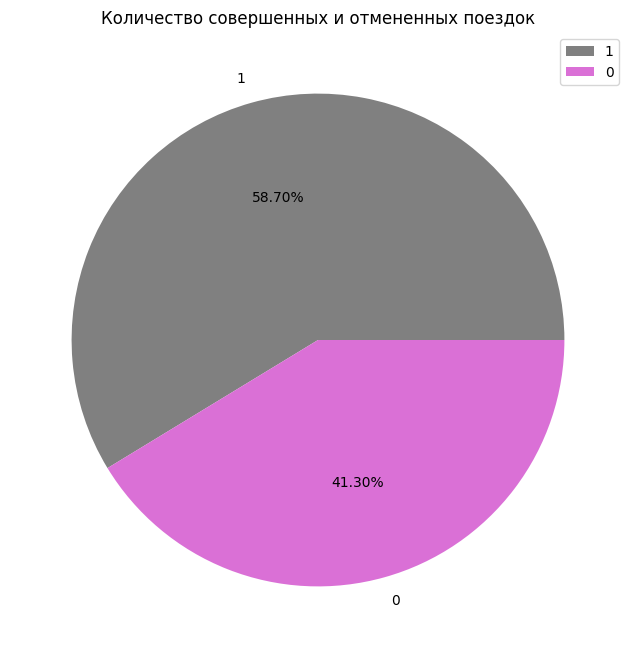

In [76]:
plt.figure(figsize=(16, 8))

plt.title('Количество совершенных и отмененных поездок')
trips_by_class = data['driver_response'].value_counts()
print(trips_by_class.sort_values())

plt.pie(trips_by_class.values, labels=trips_by_class.index, autopct='%1.2f%%', colors=['gray', 'orchid'])
plt.legend(loc='upper right')
plt.show()

6. Какой процент отмененных поездок (driver_response = 0) в зависимости от времени дня и дня недели?

   *Найти периоды с наибольшей вероятностью отмены поездок.*

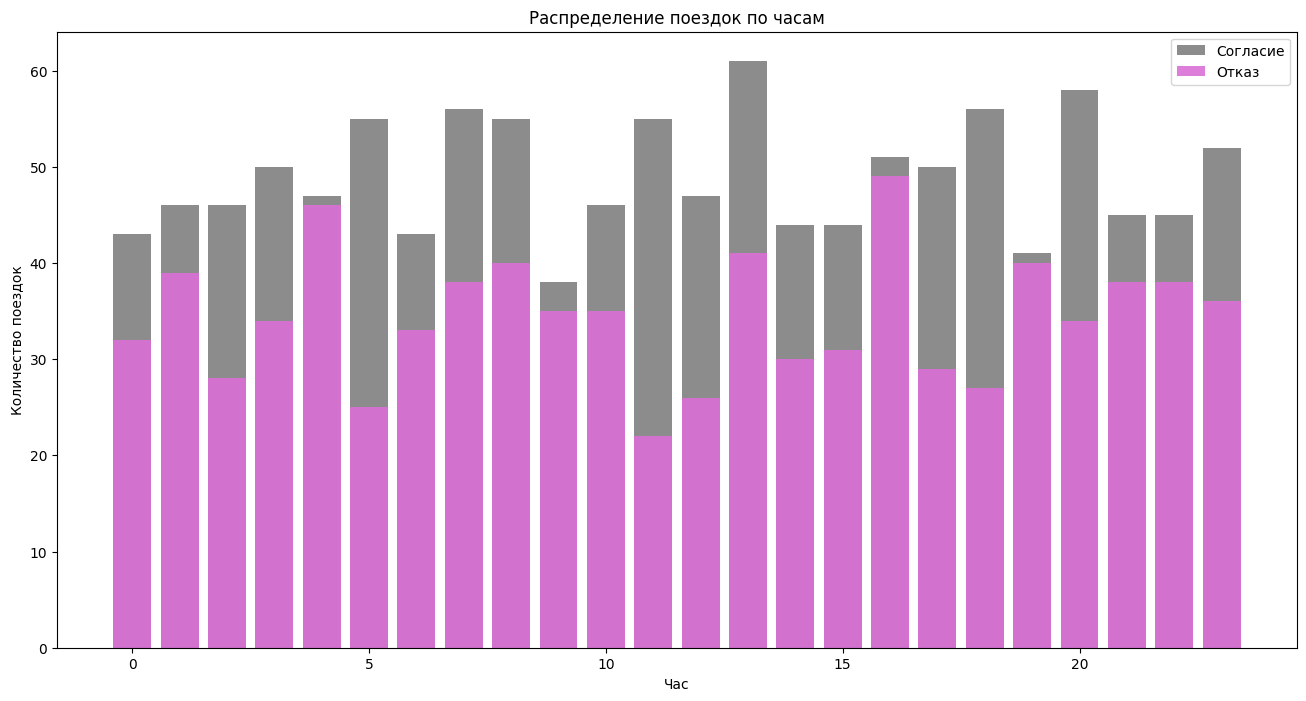

In [77]:
plt.figure(figsize=(16, 8))

# Фильтрация данных по часам
trips_by_hour_refusal = data[data['driver_response'] == 0]['hour_key'].value_counts()
trips_by_hour_agreement = data[data['driver_response'] == 1]['hour_key'].value_counts()

plt.bar(trips_by_hour_agreement.index, trips_by_hour_agreement.values, color='gray', alpha=0.9, label='Согласие')
plt.bar(trips_by_hour_refusal.index, trips_by_hour_refusal.values, color='orchid', alpha=0.9, label='Отказ')

plt.title('Распределение поездок по часам')
plt.xlabel('Час')
plt.ylabel('Количество поездок')
plt.legend()
plt.show()


Больше всего отказов в 16, чуть меньше в 4, 13 и 19 часов.

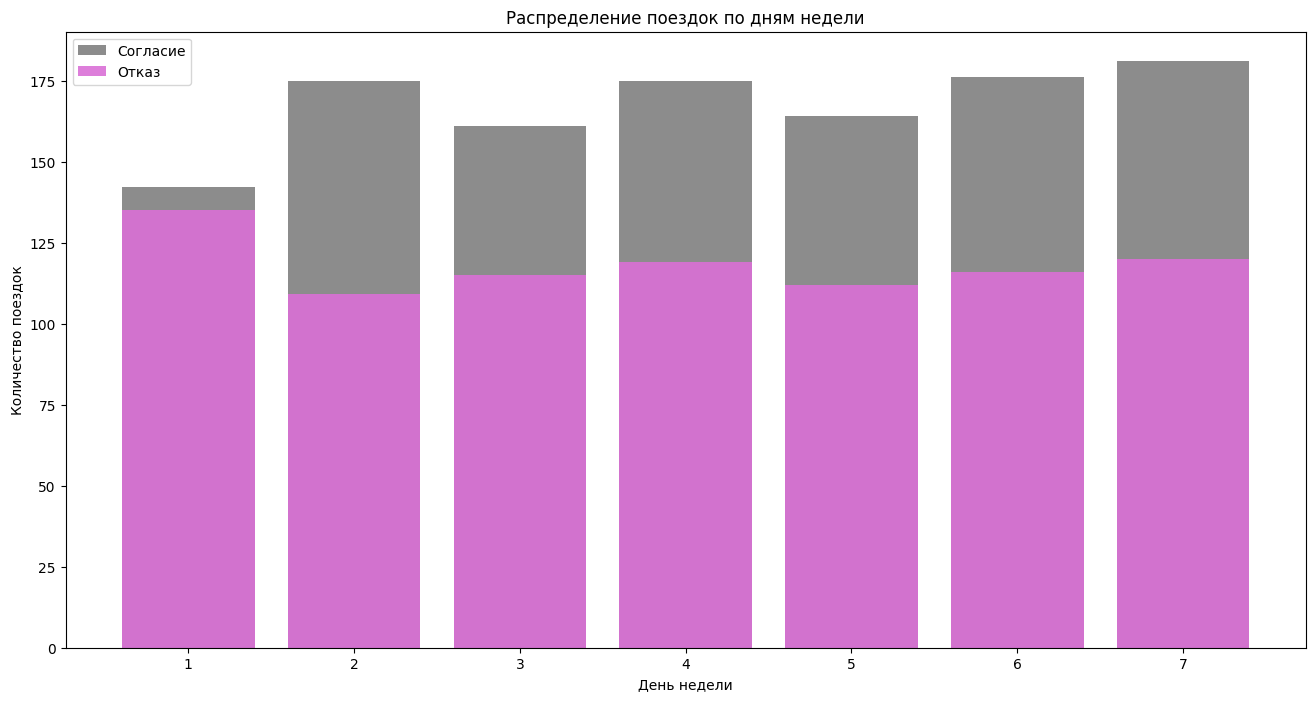

In [78]:
plt.figure(figsize=(16, 8))

# Фильтрация данных по дням
trips_by_hour_refusal = data[data['driver_response'] == 0]['weekday_key'].value_counts()
trips_by_hour_agreement = data[data['driver_response'] == 1]['weekday_key'].value_counts()

plt.bar(trips_by_hour_agreement.index, trips_by_hour_agreement.values, color='gray', alpha=0.9, label='Согласие')
plt.bar(trips_by_hour_refusal.index, trips_by_hour_refusal.values, color='orchid', alpha=0.9, label='Отказ')

plt.title('Распределение поездок по дням недели')
plt.xlabel('День недели')
plt.ylabel('Количество поездок')
plt.legend()
plt.show()


Больше всего отказов понедельник. 
(Видимо не все хотят куда-то ехать в этот день)

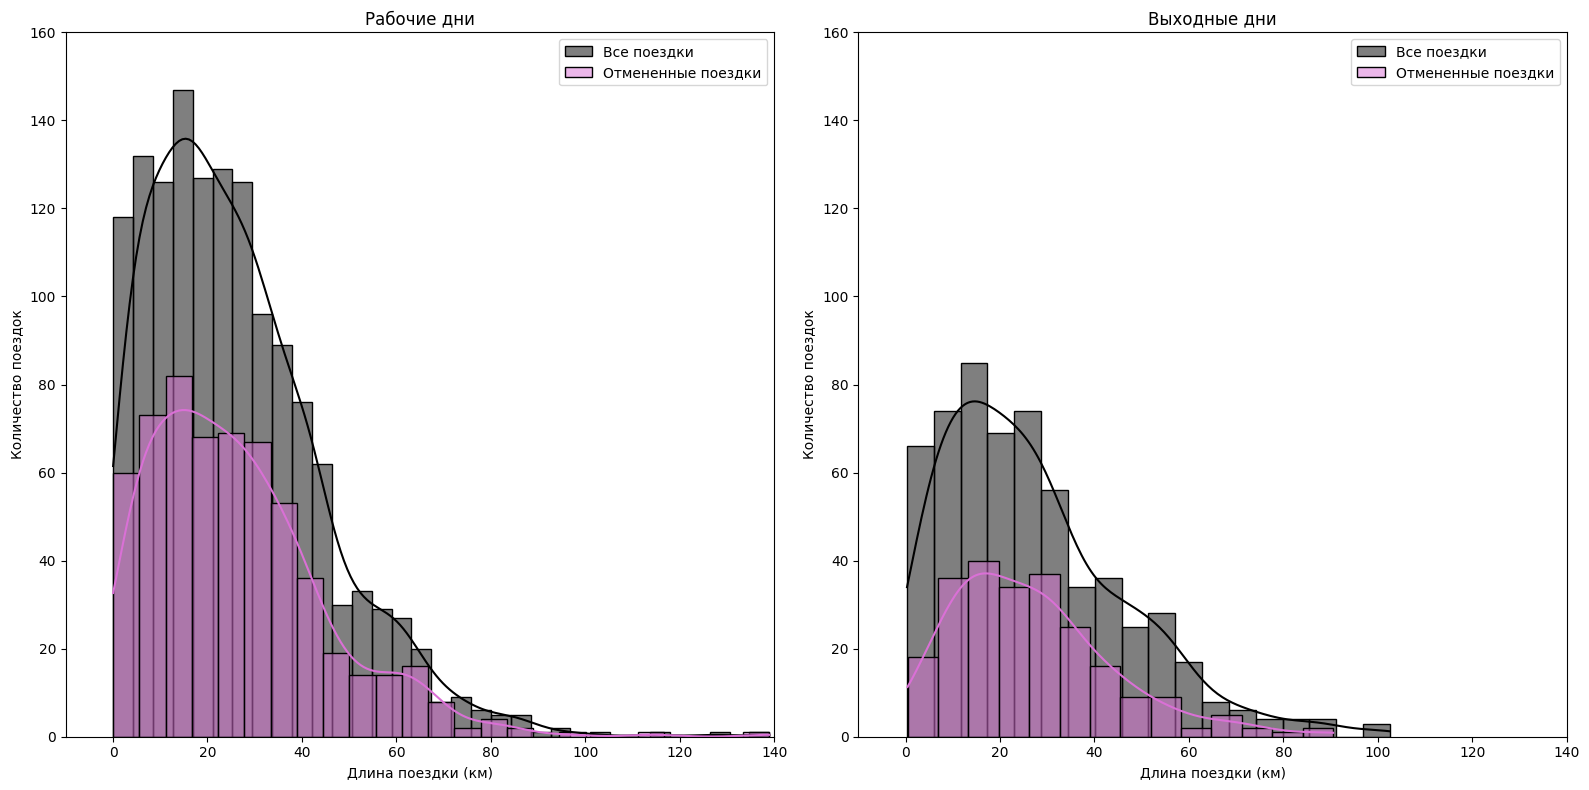

In [82]:
def plot_canceled_by_workday(data):
    plt.figure(figsize=(16, 8))
    
    # Фильтрация данных по рабочим и выходным дням
    canceled_workday = data[(data['driver_response'] == 0) & (data['workday'] == True)]['distance_km']
    canceled_weekend = data[(data['driver_response'] == 0) & (data['workday'] == False)]['distance_km']
    
    all_workday = data[data['workday']]['distance_km']
    all_weekend = data[~data['workday']]['distance_km']

    # Рабочие дни
    plt.subplot(1, 2, 1)
    sns.histplot(all_workday, kde=True, color='black', label='Все поездки')
    sns.histplot(canceled_workday, kde=True, color='orchid', label='Отмененные поездки')
    plt.title('Рабочие дни')
    plt.xlim(-10, 140)
    plt.ylim(0, 160)
    plt.xlabel('Длина поездки (км)')
    plt.ylabel('Количество поездок')
    plt.legend()

    # Выходные
    plt.subplot(1, 2, 2)
    sns.histplot(all_weekend, kde=True, color='black', label='Все поездки')
    sns.histplot(canceled_weekend, kde=True, color='orchid', label='Отмененные поездки')
    plt.title('Выходные дни')
    plt.xlim(-10, 140)
    plt.ylim(0, 160)
    plt.xlabel('Длина поездки (км)')
    plt.ylabel('Количество поездок')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Пример использования
plot_canceled_by_workday(data)

7. Поездки какого класса чаще всего отменяют? А в процентном соотношении по классам? 

*Есть ли зависимости между классом поездки и вероятностью ее отмены?*

Количество отмененных поездок в каждом классе:
offer_class_group
Economy     289
Comfort     257
Delivery    174
Premium     106
Name: count, dtype: int64

Процент отмененных поездок в каждом классе:
offer_class_group
Economy     57.8
Comfort     51.4
Delivery    34.8
Premium     21.2
Name: count, dtype: float64


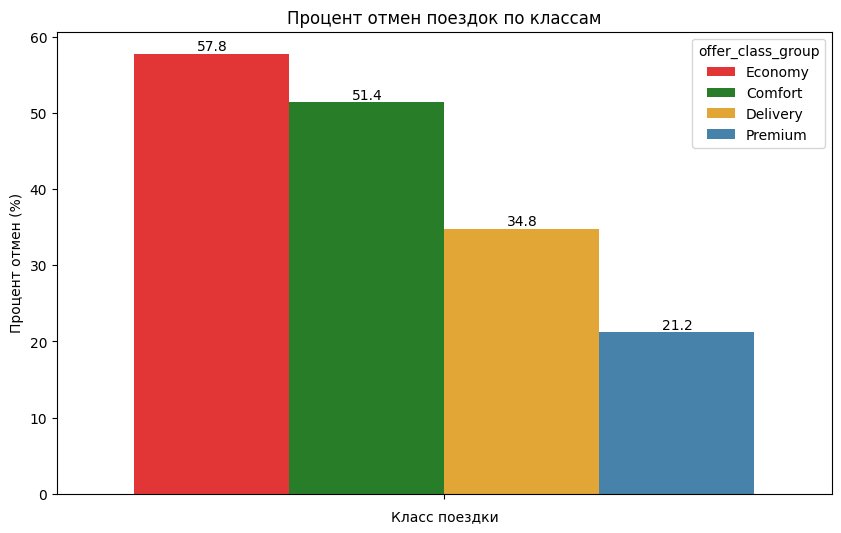

In [22]:
# Количество отмен для каждого класса
cancellations_by_class = data[data['driver_response'] == 0]['offer_class_group'].value_counts()

# Общее количество поездок по каждому классу
total_trips_by_class = data['offer_class_group'].value_counts()

# Процент отмен по каждому классу
cancellation_rate = ((cancellations_by_class / total_trips_by_class) * 100).sort_values(ascending=False)

# Выводим результаты
print("Количество отмененных поездок в каждом классе:")
print(cancellations_by_class)
print("\nПроцент отмененных поездок в каждом классе:")
print(cancellation_rate)

plt.figure(figsize=(10, 6))
ax = sns.barplot(hue=cancellation_rate.index, y=cancellation_rate.values,
                 palette=['red', 'green', 'orange', sns.color_palette()[0]], alpha=0.9)

# Добавление подписей к столбцам
for container in ax.containers:
    ax.bar_label(container, fontsize=10)

plt.title('Процент отмен поездок по классам')
plt.xlabel('Класс поездки')
plt.ylabel('Процент отмен (%)')
plt.show()


Больше всего отмененных поездок в классе Economy, меньше всего в классе Premium.

8. Как меняется количество отмен относительно длины поездки? А для каждого класса? 


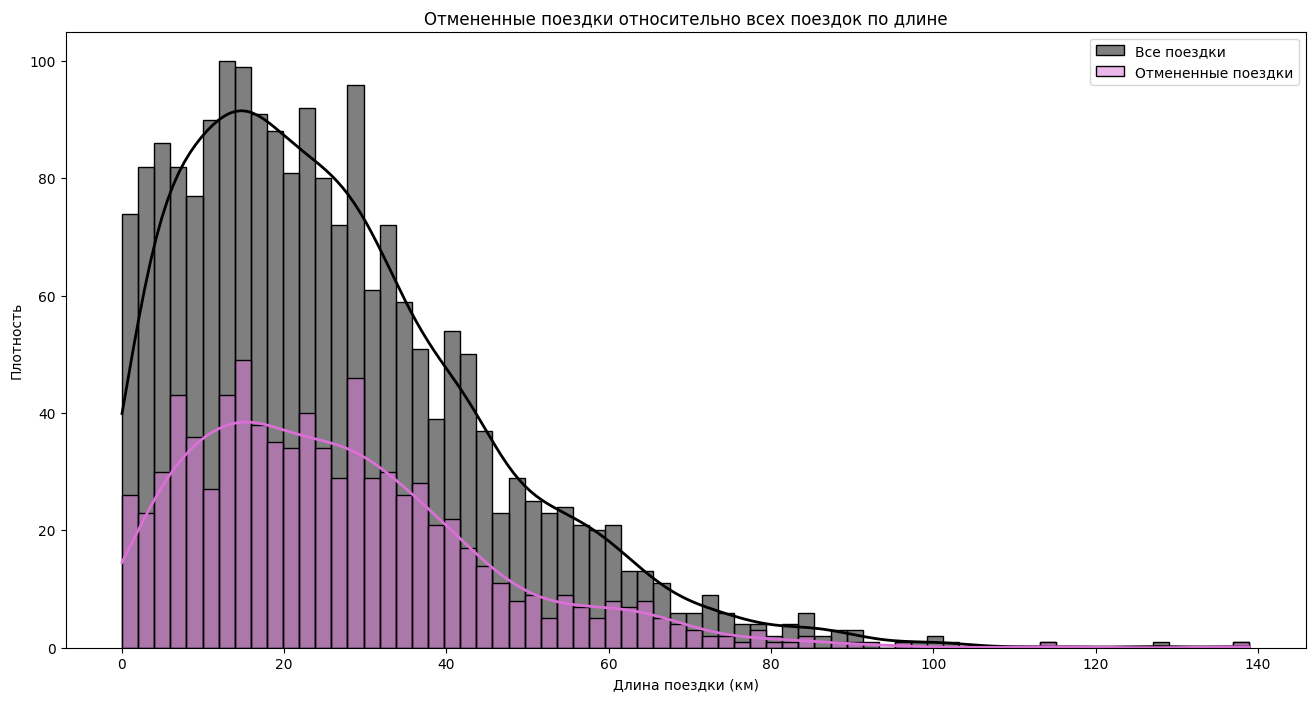

In [79]:
# Фильтрация отмененных поездок
all_trips = data['distance_km']
canceled_trips = data[data['driver_response'] == 0]['distance_km']
complited_trips = data[data['driver_response'] == 1]['distance_km']
plt.figure(figsize=(16, 8))

sns.histplot(trips_by_distance, kde=True, color='black', label='Все поездки', bins=70, line_kws = {'lw': 2})
# sns.histplot(complited_trips, kde=True, color='cyan', label='Завершенные поездки', bins=30, line_kws = {'lw': 2})
sns.histplot(canceled_trips, kde=True, color='orchid', label='Отмененные поездки', bins=70, line_kws = {'lw': 2})

plt.title('Отмененные поездки относительно всех поездок по длине')
plt.xlabel('Длина поездки (км)')
plt.ylabel('Плотность')
plt.legend()
plt.show()


Распределение оличества отмен в целом повторяет распределение плотности всех поездок по дистанции. Отказов явно меньше для поездок на дистанцию ~ 12, 18 и 50 км.

/tmp/ipykernel_7694/932953106.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='driver_response', y='distance_km', data=data, palette=['red', 'green'])


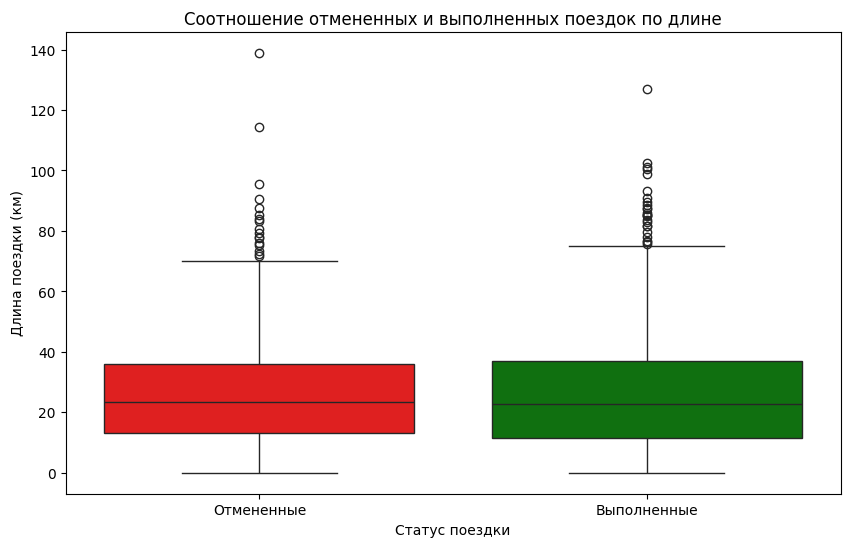

In [25]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='driver_response', y='distance_km', data=data, palette=['red', 'green'])
plt.xticks([0, 1], ['Отмененные', 'Выполненные'])
plt.title('Соотношение отмененных и выполненных поездок по длине')
plt.xlabel('Статус поездки')
plt.ylabel('Длина поездки (км)')
plt.show()

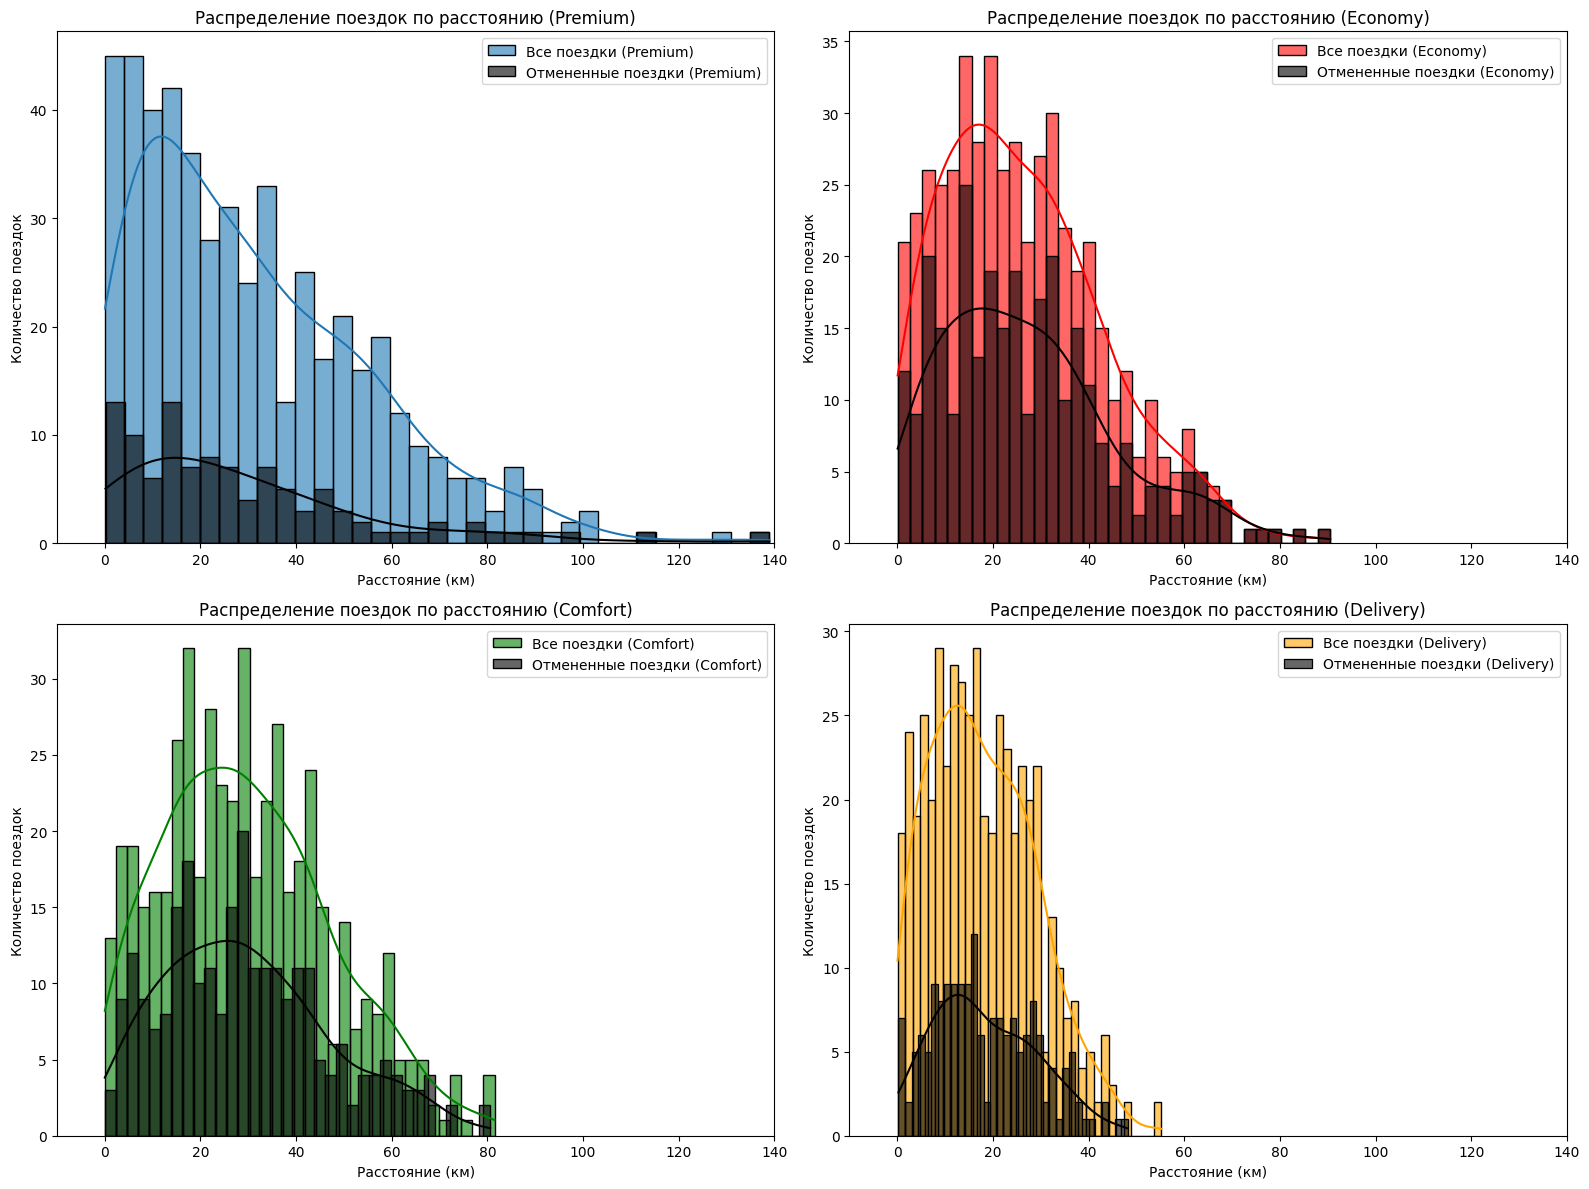

In [70]:
def distr_with_canceled_trips_by_class(data_dict, colors, data):
    plt.figure(figsize=(16, 12))

    for idx, (class_name, distances) in enumerate(data_dict.items(), start=1):
        # Фильтрация отмененных поездок для конкретного класса
        canceled_trips = data[(data['offer_class_group'] == class_name) & (data['driver_response'] == 0)]['distance_km']

        plt.subplot(2, 2, idx)
        sns.histplot(distances, color=colors[class_name], bins=35, kde=True, alpha=0.6, label=f'Все поездки ({class_name})')
        
        # Гистограмма отмененных поездок
        if len(canceled_trips) > 0:
            sns.histplot(canceled_trips, color='black', bins=35, kde=True, alpha=0.6, label=f'Отмененные поездки ({class_name})')

        plt.title(f'Распределение поездок по расстоянию ({class_name})')
        plt.xlim(-10, 140)
        plt.xlabel('Расстояние (км)')
        plt.ylabel('Количество поездок')
        plt.legend()

    plt.tight_layout()
    plt.show()


distr_with_canceled_trips_by_class(class_data, class_colors, data)


### Гипотезы:
1. В будние дни (weekday_key) наблюдается больше поездок в часы пик (hour_key), чем в выходные.


2. Эконом-класс чаще используется для коротких поездок (distance_km) по сравнению с Comfort и Premium.

3. Чем дальше поездка (distance_km), тем выше вероятность её отмены.


4. Premium класс имеет самую низкую вероятность отмены по сравнению с Economy и Comfort.



5. В выходные дни больше поездок на короткие дистанции (distance_km), чем в будние дни.


In [83]:
# Две выборки: расстояние для отмененных поездок и для завершенных поездок
canceled_trips = data[data['driver_response'] == 0]['distance_km']
completed_trips = data[data['driver_response'] == 1]['distance_km']

# Проведение t-теста
t_stat, p_value = stats.ttest_ind(canceled_trips, completed_trips, equal_var=False)

# Вывод результатов
print(f"t-статистика: {t_stat}")
print(f"p-значение: {p_value}")

# Интерпретация результата
if p_value < 0.05:
    print("cредние расстояния поездок для отмененных и завершенных поездок различаются, принимается.")
else:
    print("Нет достаточных оснований отвергнуть гипотезу о равенстве средних расстояний поездок для отмененных и завершенных поездок.")


t-статистика: -0.10699004982435356
p-значение: 0.914808558982863
Нет достаточных оснований отвергнуть гипотезу о равенстве средних расстояний поездок для отмененных и завершенных поездок.


In [84]:
# Фильтрация данных по классам
economy_trips = data[data['offer_class_group'] == 'Economy']['driver_response']
comfort_trips = data[data['offer_class_group'] == 'Comfort']['driver_response']
premium_trips = data[data['offer_class_group'] == 'Premium']['driver_response']

# Проведение t-тестов между классами
t_stat_economy_vs_premium, p_value_economy_vs_premium = stats.ttest_ind(economy_trips, premium_trips, equal_var=False)
t_stat_comfort_vs_premium, p_value_comfort_vs_premium = stats.ttest_ind(comfort_trips, premium_trips, equal_var=False)

# Вывод результатов
print(f"Economy vs Premium: t-статистика = {t_stat_economy_vs_premium}, p-значение = {p_value_economy_vs_premium}")
print(f"Comfort vs Premium: t-статистика = {t_stat_comfort_vs_premium}, p-значение = {p_value_comfort_vs_premium}")

# Интерпретация результата
if p_value_economy_vs_premium < 0.05:
    print("Есть значимые различия между вероятностями отмены для классов Economy и Premium.")
else:
    print("Нет значимых различий между вероятностями отмены для классов Economy и Premium.")

if p_value_comfort_vs_premium < 0.05:
    print("Есть значимые различия между вероятностями отмены для классов Comfort и Premium.")
else:
    print("Нет значимых различий между вероятностями отмены для классов Comfort и Premium.")


Economy vs Premium: t-статистика = -12.75337827124457, p-значение = 1.5481432856102834e-34
Comfort vs Premium: t-статистика = -10.448696238410308, p-значение = 2.810513868469906e-24
Есть значимые различия между вероятностями отмены для классов Economy и Premium.
Есть значимые различия между вероятностями отмены для классов Comfort и Premium.


### 7	Проведите стат. тест 
(поможет: функция scipy.stats.ttest_ind), проверьте гипотезу, что дистанции поездок в комфорт-классе отличаются от дистанций поездок эконом-класса (примечание: H0 – выборки не отличаются, H1 – выборки отличны; уровень значимости = 5%)

In [28]:
comfort_distances = data[data['offer_class_group'] == 'Comfort']['distance_km']
economy_distances = data[data['offer_class_group'] == 'Economy']['distance_km']

# Проведение t-теста
t_stat, p_value = stats.ttest_ind(comfort_distances, economy_distances)

# Уровень значимости
alpha = 0.05

# Вывод результатов
print(f"t-statistic: {t_stat:.4f}, p-value: {p_value:.4f}")

# Проверка гипотезы
if p_value < alpha:
    print("Отклоняем нулевую гипотезу (H0), выборки отличаются.")
else:
    print("Не можем отклонить нулевую гипотезу (H0), выборки не отличаются.")

# Извлекаем выборки дистанций для классов Comfort и Economy
comfort_distances = data[data['offer_class_group'] == 'Comfort']['distance_km']
economy_distances = data[data['offer_class_group'] == 'Economy']['distance_km']

# Проведение t-теста
t_stat, p_value = stats.ttest_ind(comfort_distances, economy_distances)

# Уровень значимости
alpha = 0.05

# Вывод результатов
print(f"t-statistic: {t_stat:.4f}, p-value: {p_value:.4f}")

# Проверка гипотезы
if p_value < alpha:
    print("Отклоняем нулевую гипотезу (H0), выборки отличаются.")
else:
    print("Не можем отклонить нулевую гипотезу (H0), выборки не отличаются.")


t-statistic: 3.1706, p-value: 0.0016
Отклоняем нулевую гипотезу (H0), выборки отличаются.
t-statistic: 3.1706, p-value: 0.0016
Отклоняем нулевую гипотезу (H0), выборки отличаются.


### 8	Сделайте выводы по результатам проведения стат. теста
### 9	Вычислите средние выборок исследуемых классов, с учётом полученного результата проверки гипотез определите – какой из классов предпочитают на дальние поездки (эконом или комфорт)
### 10	Оформите презентацию для демонстрации результатов стейкхолдерам (примечание: для оформления воспользуйтесь шаблоном)